In [40]:
from dotenv import load_dotenv

# '열쇠 보관함'의 정확한 주소를 알려줍니다.
load_dotenv(dotenv_path=".env", override=True) 

True

In [41]:
from langchain_openai import ChatOpenAI

query = "인프럼에는 어떤 강의가 있나요?"

llm = ChatOpenAI(model="gpt-4o-mini")
llm.invoke(query)

AIMessage(content='인프럼(Inflearn)은 다양한 온라인 강의를 제공하는 플랫폼으로, 프로그래밍, 데이터 분석, 디자인, 마케팅, IT 관련 주제 등 여러 분야의 강의를 찾을 수 있습니다. 여기에는 다음과 같은 강의들이 포함될 수 있습니다:\n\n1. **프로그래밍**: Python, Java, JavaScript, C++, 웹 개발, 앱 개발 등\n2. **데이터 사이언스**: 데이터 분석, 머신러닝, 인공지능, 딥러닝 등\n3. **디자인**: UI/UX 디자인, 그래픽 디자인, 포토샵, 일러스트레이터 등\n4. **마케팅**: 디지털 마케팅, SEO, 소셜 미디어 마케팅 등\n5. **IT 및 네트워킹**: 클라우드 컴퓨팅, 사이버 보안, 시스템 관리 등\n\n각 강의는 초급부터 고급 과정까지 다양하게 제공되며, 강사의 경험과 강의 스타일에 따라 선택할 수 있습니다. 인프럼 웹사이트를 방문하면 최신 강의 목록과 자세한 정보를 확인할 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 236, 'prompt_tokens': 18, 'total_tokens': 254, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--ca033e80-9a7a-4d31-ac2f-88af50fb7c33-0

In [44]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]


In [45]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

In [46]:
def generate(state: AgentState) -> AgentState:
    messages = state['messages']
    ai_message = llm.invoke(messages)
    return {'messages': [ai_message]}

In [47]:
from langgraph.graph import START, END

graph_builder.add_node('generate', generate)


In [48]:
graph_builder.add_edge(START, 'generate')
graph_builder.add_edge('generate', END)

In [49]:
graph = graph_builder.compile()

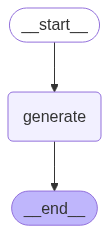

In [51]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [53]:
from langchain_core.messages import HumanMessage

initial_state = {"messages": [HumanMessage(query)]}
graph.invoke(initial_state)

{'messages': [AIMessage(content='인프럼(Inflearn)은 다양한 주제의 온라인 강의를 제공하는 플랫폼입니다. 주로 IT, 프로그래밍, 데이터 사이언스, 디자인, 마케팅, 비즈니스 등 여러 분야의 강의가 있습니다. 예를 들어, 다음과 같은 강의들이 있을 수 있습니다:\n\n1. **프로그래밍**: Python, Java, JavaScript, C++, Ruby 등\n2. **웹 개발**: HTML, CSS, React, Vue.js, Node.js 등\n3. **데이터 과학**: 머신러닝, 데이터 분석, 통계학, R, SQL 등\n4. **디자인**: UI/UX 디자인, 포토샵, 일러스트레이터 등\n5. **모바일 개발**: Android, iOS 개발, Flutter 등\n6. **클라우드**: AWS, Azure, Google Cloud 등\n7. **마케팅**: 디지털 마케팅, SEO, 콘텐츠 마케팅 등\n\n각 강의는 강사에 따라 내용과 수준이 다르므로, 필요한 주제에 맞는 강의를 선택할 수 있습니다. 인프럼 웹사이트를 방문하면 최신 강의 목록과 정보를 확인할 수 있습니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 252, 'prompt_tokens': 18, 'total_tokens': 270, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93c', '